In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('HR-Employee-Attrition.xlsx', index_col='EmployeeNumber')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

## Example Questions

### 1. How many employees are there by department in the data set?

In [5]:
data['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

### 2. What is the overall attrition rate?

In [6]:
data['Attrition'].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [7]:
attrition = 100*data['Attrition'].value_counts(normalize=True)['Yes']
print(f'{attrition:0.2f}%')

16.12%


### 3. What is the avarage hourly rate?

In [8]:
data['HourlyRate'].mean()

np.float64(65.89115646258503)

### 4. What is the average number of years at the company?

In [9]:
data['YearsAtCompany'].mean()
data['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

### 5. Who are the 5 employees with the most number of years at the company?

In [10]:
data['YearsAtCompany'].sort_values(ascending=False)[:5].index

Index([165, 131, 374, 1578, 776], dtype='int64', name='EmployeeNumber')

In [11]:
data['YearsAtCompany'].sort_values(ascending=False).head().index

Index([165, 131, 374, 1578, 776], dtype='int64', name='EmployeeNumber')

### 6. How satisfied are employees overall?

In [12]:
data['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

###### Transform to meaningful labels

In [13]:
js_values = data['JobSatisfaction'].unique()
js_cat = ['Very High', 'High', 'Medium', 'Low']
print(js_values)
print(js_cat)

[4 2 3 1]
['Very High', 'High', 'Medium', 'Low']


In [14]:
JobSatisfaction_cat = dict(zip(js_values, js_cat))
JobSatisfaction_cat

{np.int64(4): 'Very High',
 np.int64(2): 'High',
 np.int64(3): 'Medium',
 np.int64(1): 'Low'}

In [15]:
data['JobSatisfaction'] = data['JobSatisfaction'].map(JobSatisfaction_cat)

In [16]:
data['JobSatisfaction'].head()

EmployeeNumber
1    Very High
2         High
4       Medium
5       Medium
7         High
Name: JobSatisfaction, dtype: object

In [17]:
data['JobSatisfaction'].value_counts()

JobSatisfaction
Very High    459
Medium       442
Low          289
High         280
Name: count, dtype: int64

In [18]:
data['JobSatisfaction'] = data['JobSatisfaction'].astype(dtype='category') # convert to category
data['JobSatisfaction'].dtype

CategoricalDtype(categories=['High', 'Low', 'Medium', 'Very High'], ordered=False, categories_dtype=object)

In [19]:
100*data['JobSatisfaction'].value_counts(normalize=True) # as percentage

JobSatisfaction
Very High    31.224490
Medium       30.068027
Low          19.659864
High         19.047619
Name: proportion, dtype: float64

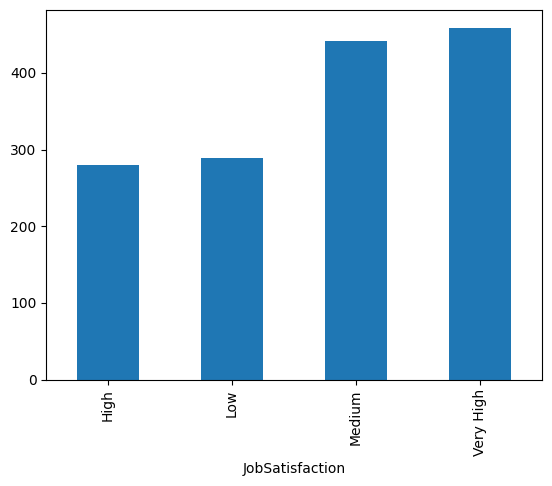

In [20]:
data['JobSatisfaction'].value_counts(sort=False).plot(kind='bar'); # plot

## Further Questions

### 1. Give me the list of the employees with Low level of Job Satisfaction

In [21]:
data['JobSatisfaction'] == 'Low'

EmployeeNumber
1       False
2       False
4       False
5       False
7       False
        ...  
2061    False
2062     True
2064    False
2065    False
2068    False
Name: JobSatisfaction, Length: 1470, dtype: bool

In [22]:
data[data['JobSatisfaction'] == 'Low'].index # provide the index since there is no name columns

Index([  10,   20,   27,   31,   33,   38,   51,   52,   54,   68,
       ...
       1975, 1980, 1998, 2021, 2023, 2038, 2054, 2055, 2057, 2062],
      dtype='int64', name='EmployeeNumber', length=289)

### 2. Give me the list of employees with Low level of both JobSatisfaction anf JobInvolvement

In [23]:
JobInvolvement_cat = {1: 'Low',
                      2: 'Medium',
                      3: 'High',
                      4: 'Very High'
                     }

In [24]:
data['JobInvolvement'] = data['JobInvolvement'].map(JobInvolvement_cat)
data['JobInvolvement'].head()

EmployeeNumber
1      High
2    Medium
4    Medium
5      High
7      High
Name: JobInvolvement, dtype: object

In [25]:
(data['JobSatisfaction'] == 'Low') & (data['JobInvolvement'] == 'Low')

EmployeeNumber
1       False
2       False
4       False
5       False
7       False
        ...  
2061    False
2062    False
2064    False
2065    False
2068    False
Length: 1470, dtype: bool

In [26]:
data.loc[(data['JobSatisfaction'] == 'Low') & (data['JobInvolvement'] == 'Low')].index.values

array([  33,  235,  454,  615, 1019, 1037, 1237, 1460, 1478, 1544, 1611,
       1622, 1905, 1956])

### 3. Compare the employees with Low and Very High JobSatisfaction across the following variables: Age, Department, DistanceFromHome, HourlyRate, MonthlyIncome and YearsAtCompany.

In [27]:
subset_of_interest = data.loc[data['JobSatisfaction'].isin(['Low', 'Very High'])]
subset_of_interest

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
8,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,4,...,3,80,0,8,2,2,7,7,3,6
10,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,3,...,1,80,3,12,3,2,1,0,0,0
18,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,2,...,3,80,1,3,2,3,2,2,1,2
20,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,2,...,3,80,1,10,1,3,10,9,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,4,...,2,80,1,20,3,3,3,2,2,0
2056,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2,...,1,80,1,21,2,2,20,9,9,6
2057,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2,...,2,80,0,10,2,3,9,4,1,7


In [28]:
subset_of_interest['JobSatisfaction'].value_counts()

JobSatisfaction
Very High    459
Low          289
High           0
Medium         0
Name: count, dtype: int64

In [29]:
# removed unused values
subset_of_interest = subset_of_interest.loc[subset_of_interest['JobSatisfaction'].cat.remove_unused_categories().index]

In [30]:
subset_of_interest['JobSatisfaction'].value_counts() # the values we are interested

JobSatisfaction
Very High    459
Low          289
High           0
Medium         0
Name: count, dtype: int64

In [31]:
grouped = subset_of_interest.groupby('JobSatisfaction', observed=True)

#### Age

In [32]:
grouped['Age'].mean()

JobSatisfaction
Low          36.916955
Very High    36.795207
Name: Age, dtype: float64

In [33]:
grouped['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
JobSatisfaction,,,,,,,,
Low,289.0,36.916955,9.245496,19.0,30.0,36.0,42.0,60.0
Very High,459.0,36.795207,9.125609,18.0,30.0,35.0,43.0,60.0


#### Department

In [34]:
grouped['Department'].value_counts().unstack()

Department,Human Resources,Research & Development,Sales
JobSatisfaction,,,
Low,11,192,86
Very High,17,295,147


In [35]:
100*grouped['Department'].value_counts(normalize=True).unstack()

Department,Human Resources,Research & Development,Sales
JobSatisfaction,,,
Low,3.806228,66.435986,29.757785
Very High,3.703704,64.270153,32.026144


#### DistanceFromHome

In [36]:
data['DistanceFromHome'].dtype

dtype('int64')

In [37]:
grouped['DistanceFromHome'].describe()

,count,mean,std,min,25%,50%,75%,max
JobSatisfaction,,,,,,,,
Low,289.0,9.190311,8.045127,1.0,2.0,7.0,14.0,29.0
Very High,459.0,9.030501,8.257004,1.0,2.0,7.0,14.0,29.0


#### HourlyRate

In [38]:
grouped['HourlyRate'].describe()

,count,mean,std,min,25%,50%,75%,max
JobSatisfaction,,,,,,,,
Low,289.0,68.636678,20.439515,30.0,52.0,72.0,86.0,100.0
Very High,459.0,64.681917,20.647571,30.0,47.0,64.0,82.5,100.0


#### MonthlyIncome

In [39]:
grouped['MonthlyIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
JobSatisfaction,,,,,,,,
Low,289.0,6561.570934,4645.170134,1091.0,3072.0,4968.0,8564.0,19943.0
Very High,459.0,6472.732026,4573.906428,1051.0,2927.5,5126.0,7908.0,19845.0


#### YearsAtCompany

In [40]:
grouped['YearsAtCompany'].describe()

,count,mean,std,min,25%,50%,75%,max
JobSatisfaction,,,,,,,,
Low,289.0,6.989619,6.243599,0.0,3.0,5.0,9.0,36.0
Very High,459.0,6.962963,5.900257,0.0,3.0,5.0,10.0,40.0


4. ### Comparing the means across all numerical variables

In [41]:
data.describe().loc['mean']

Age                            36.923810
DailyRate                     802.485714
DistanceFromHome                9.192517
Education                       2.912925
EmployeeCount                   1.000000
EnvironmentSatisfaction         2.721769
HourlyRate                     65.891156
JobLevel                        2.063946
MonthlyIncome                6502.931293
MonthlyRate                 14313.103401
NumCompaniesWorked              2.693197
PercentSalaryHike              15.209524
PerformanceRating               3.153741
RelationshipSatisfaction        2.712245
StandardHours                  80.000000
StockOptionLevel                0.793878
TotalWorkingYears              11.279592
TrainingTimesLastYear           2.799320
WorkLifeBalance                 2.761224
YearsAtCompany                  7.008163
YearsInCurrentRole              4.229252
YearsSinceLastPromotion         2.187755
YearsWithCurrManager            4.123129
Name: mean, dtype: float64

In [42]:
numeric_cols = subset_of_interest.select_dtypes(include=np.number).columns
numeric_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobLevel', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [43]:
mean_comparison_df = pd.DataFrame(columns=numeric_cols, index=['Low', 'Very High']) # empty DataFrame
mean_comparison_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
for var in numeric_cols:
    mean_comparison_df[var] = grouped[var].mean()

In [45]:
mean_comparison_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Low,36.916955,782.505190,9.190311,2.944637,1.0,2.743945,68.636678,2.055363,6561.570934,14095.377163,...,2.730104,80.0,0.788927,11.608997,2.816609,2.771626,6.989619,4.276817,2.314879,4.384083
Very High,36.795207,802.069717,9.030501,2.901961,1.0,2.749455,64.681917,2.052288,6472.732026,14103.429194,...,2.701525,80.0,0.823529,11.189542,2.819172,2.729847,6.962963,4.202614,2.148148,4.074074


In [46]:
grouped['Age'].mean()

JobSatisfaction
Low          36.916955
Very High    36.795207
Name: Age, dtype: float64

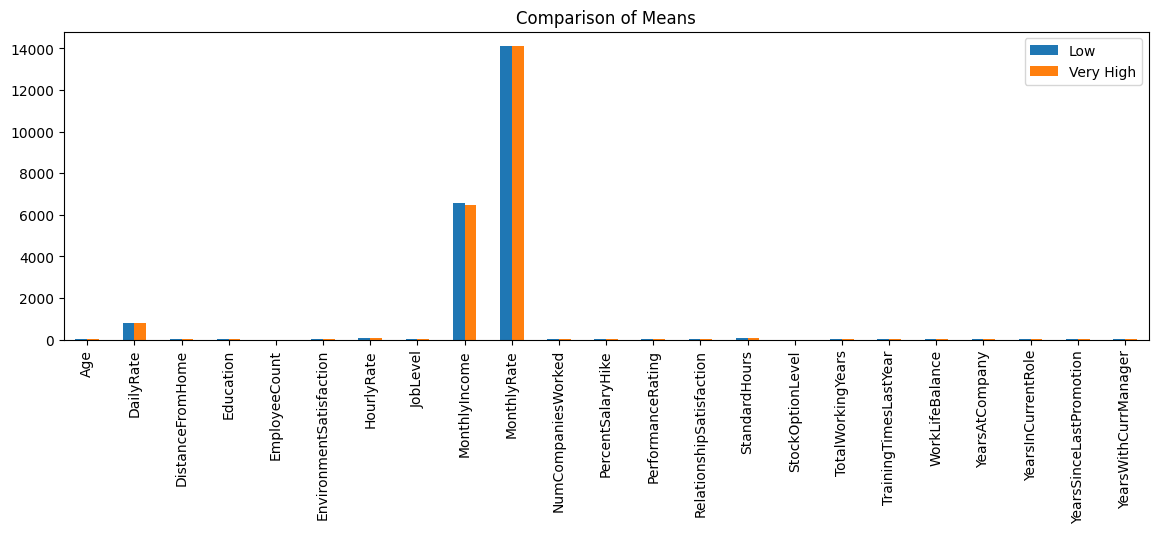

In [47]:
mean_comparison_df.transpose().plot(kind='bar', figsize=(14, 4), title='Comparison of Means');

In [48]:
sample_df = pd.DataFrame(columns=['No'], index=[1, 2])
sample_df

,No
1,NaN
2,NaN


In [49]:
sample_df['No'] = ['One', 'Two']
sample_df

,No
1,One
2,Two
